In [ ]:
import pandas as pd, numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datasets_Rayeed_GSV_POI_LU/model_35.xlsx', index_col='site_name' )

In [ ]:
df.head()

,Site_type,OID,Mean PNC (# / cm3),Mean PM2.5 (µg/m3),gsv_wall_p100,gsv_building_p100,gsv_house_p100,gsv_awning_p100,gsv_sky_p100,gsv_earth_p100,...,pop_1500,build_100,build_150,build_250,build_500,build_750,build_1000,build_1250,build_1500,distPrim
site_name,,,,,,,,,,,,,,,,,,,,,
Aftabnagar,Residential,5312,60300,105,3.690000,32.427500,0.257500,0.000000,39.310000,11.117500,...,256068,0,0,0,177,1753,5008,9487,14335,590.680143
Agashadek_road,Mixed,2814,60800,114,12.262500,39.130000,0.195000,0.002500,16.262500,0.995000,...,511400,205,462,1271,4565,8308,13048,18275,23737,2194.923354
Airport,Mixed,9623,56900,90,6.804568,33.023806,0.231656,0.096952,19.973174,3.473092,...,29525,6,17,59,264,607,1056,1617,2333,379.715085
Azimpur,Residential,3263,48400,73,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,380676,61,158,481,2006,4193,7766,12799,18346,716.846964
Baridhara,Residential,7241,46000,107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,97209,0,0,118,986,2476,4194,5965,7782,263.712339


<Axes: >

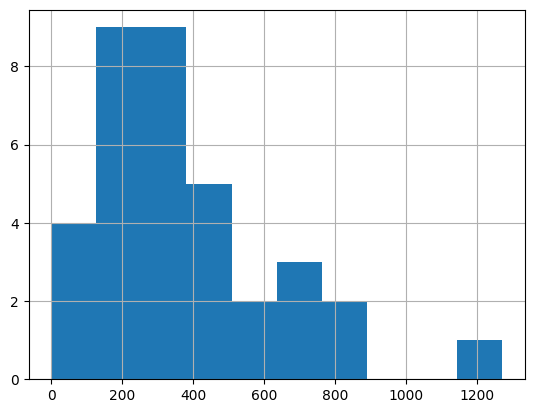

In [ ]:
df['build_250'].hist()

In [ ]:
# Extract column names
column_names = df.columns

# Extract unique prefixes
prefixes = set()
for name in column_names:
    prefix = name.split('_')[0]
    prefixes.add(prefix)

# Convert set to list and sort
unique_prefixes = sorted(list(prefixes))

print(unique_prefixes)

['Mean PM2.5 (µg/m3)', 'Mean PNC (# / cm3)', 'OID', 'RdAll', 'RdL1', 'RdL2', 'RdL3', 'RdL4', 'RdclP', 'RdclS', 'RdclT', 'Site', 'build', 'distPrim', 'gsv', 'land', 'pop', 'rest']


<Axes: >

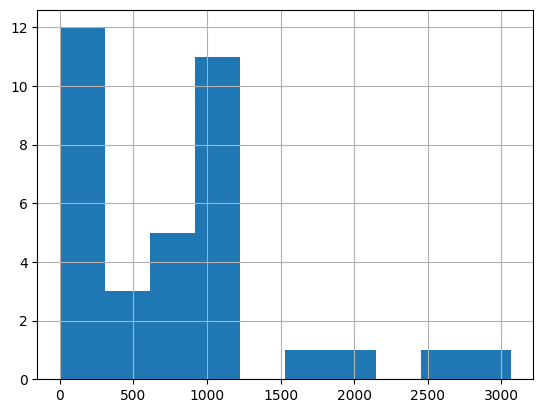

In [ ]:
df['RdclP_250'].hist()

<Axes: >

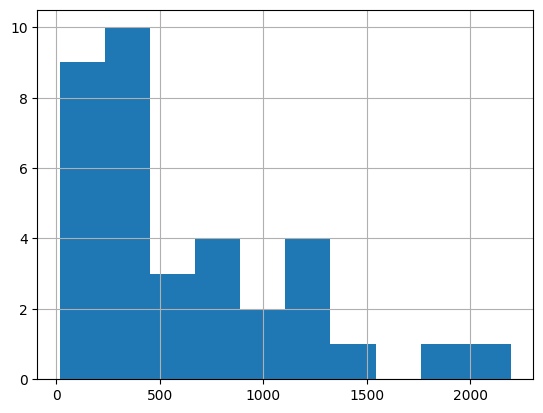

In [ ]:
df['distPrim'].hist()

In [ ]:
print(df.columns)

Index(['Site_type', 'OID', 'Mean PNC (# / cm3)', 'Mean PM2.5 (µg/m3)',
       'gsv_wall_p100', 'gsv_building_p100', 'gsv_house_p100',
       'gsv_awning_p100', 'gsv_sky_p100', 'gsv_earth_p100',
       ...
       'pop_1500', 'build_100', 'build_150', 'build_250', 'build_500',
       'build_750', 'build_1000', 'build_1250', 'build_1500', 'distPrim'],
      dtype='object', length=361)


<Axes: >

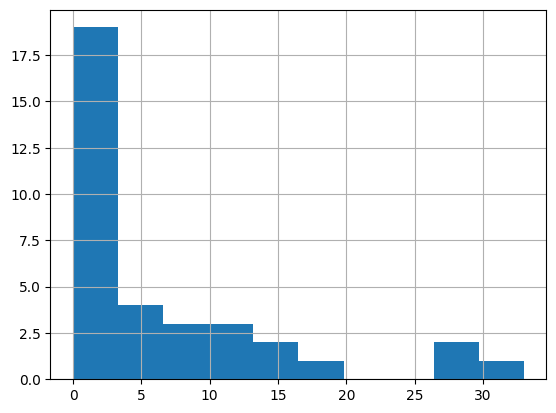

In [ ]:
df['rest_s250'].hist()

In [ ]:
# Columns to exclude from log transformation
exclude_columns = ['Site_type', 'OID', 'Mean PNC (# / cm3)', 'Mean PM2.5 (µg/m3)']
exclude_columns += [col for col in df.columns if col.startswith('gsv')]

# Apply log transformation to other columns
for col in df.columns:
    if col not in exclude_columns:
        df[col] = np.log(df[col] + 1)